<a href="https://colab.research.google.com/github/MainakRepositor/Data-Analysis/blob/master/Car_Specifications_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><u><center><font color='indigo' size=10>CAR SPECIFICATIONS ANALYSIS</font></center></u></h1>

# 1. Importing necessary libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
print("All necessary packages are included successfully!")

All necessary packages are included successfully!


# 2. Importing the datasets

In [34]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/auto-mpg.csv'
df = pd.read_csv(url,error_bad_lines=False)
print("Displaying top 10 values of the dataset\n")
df.head(10)

Displaying top 10 values of the dataset



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


# 3. Exploring the dataset

In [35]:
# Number of rows and columns in the dataset
r,c = df.shape 
print("Number of columns in the dataset = ",c)
print("Number of rows in the dataset    = ",r)

Number of columns in the dataset =  9
Number of rows in the dataset    =  398


In [36]:
# Information about the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### Since horsepower is a numeric data, it should not be of type object. So we need to rectify it. 

In [37]:
df['horsepower'] = pd.to_numeric(df['horsepower'],errors='coerce')

In [38]:
# recheck the data type of horsepower
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


### So, horsepower has been converted to float

# 4. Removing outliers

### Converting weight from kgs to tons

In [39]:
df['weight'] = df['weight']/1000
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3.504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3.693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3.436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3.433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3.449,10.5,70,1,ford torino


### Now, data items are on similar scale with each other

# 5. Missing data checks

In [40]:
print("Are there any null values in the dataset ?",df.isnull().values.any())

Are there any null values in the dataset ? True


In [41]:
print("Display null value counts, columnwise\n")
df.isnull().sum()

Display null value counts, columnwise



mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

### Column 'horsepower' has got 6 missing data which can be replaced by the column mean

In [43]:
m = df['horsepower'].mean()
df = df.replace(np.nan,m)

In [45]:
print("Are there any null values in dataset ?",df.isnull().values.any())

Are there any null values in dataset ? False


### So, we have prepared our data for analysis after removal of outliers, missing values and rectifying datatypes.

# 6. Statistical insights into data

In [46]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,398,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6
cylinders,398,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8
displacement,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455
horsepower,398,NaN,NaN,NaN,104.469,38.1992,46,76,95,125,230
weight,398,NaN,NaN,NaN,2.97042,0.846842,1.613,2.22375,2.8035,3.608,5.14
acceleration,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8
model year,398,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82
origin,398,NaN,NaN,NaN,1.57286,0.802055,1,1,1,2,3
car name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The mean milage of a car is 23.51 and mean power is 104.469 bHp

# 7. Plotting the Spearman's correlation

Text(0.5, 1.0, 'Correlation of features of a car\n')

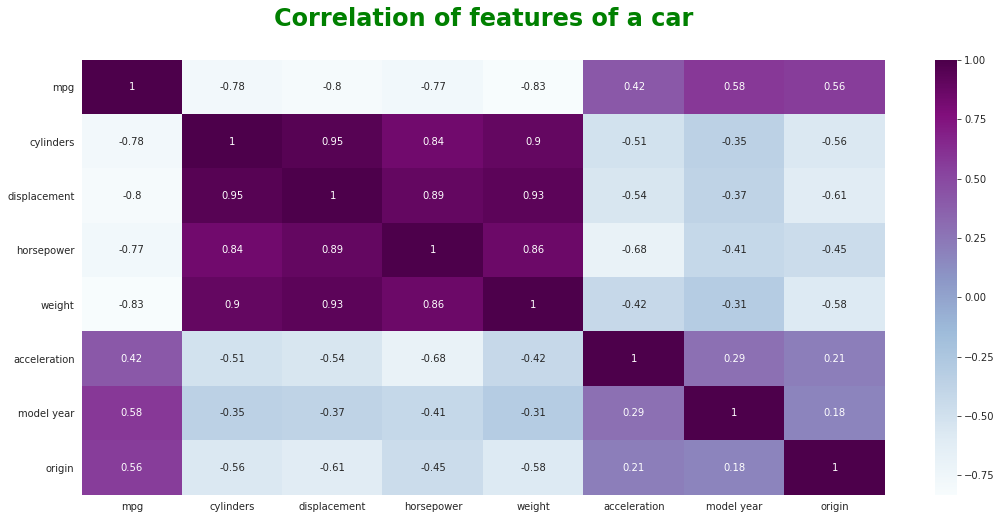

In [48]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')
plt.title('Correlation of features of a car\n',size=24,fontweight='bold',color='green')

### From the Spearman's matrix, we can evaluate and conclude that 'cylinder','displacement','horsepower' and 'weight' columns have good correlation.

# 8. Building a Machine Learning model

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x = df.iloc[:,1].values.reshape(-1,1)
y = df.iloc[:,3].values


In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [51]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_pred = reg.predict(x_test)

In [53]:
print(y_pred)

[150.35446923  77.11311478 150.35446923  77.11311478 113.733792
  77.11311478  77.11311478  77.11311478 150.35446923 113.733792
  77.11311478  77.11311478 113.733792    77.11311478 150.35446923
  77.11311478  77.11311478  77.11311478 113.733792    77.11311478
 150.35446923  77.11311478  77.11311478  77.11311478  77.11311478
 113.733792    77.11311478  77.11311478  77.11311478 113.733792
 113.733792    77.11311478 113.733792    77.11311478 113.733792
  77.11311478 113.733792   150.35446923  77.11311478 150.35446923
 150.35446923 150.35446923  77.11311478  58.80277617  77.11311478
  77.11311478 113.733792   150.35446923 113.733792    77.11311478
  77.11311478  77.11311478 150.35446923  77.11311478 150.35446923
 150.35446923 113.733792   113.733792    77.11311478 150.35446923
 113.733792    77.11311478 113.733792   113.733792   150.35446923
 150.35446923 150.35446923 113.733792    77.11311478 150.35446923
  77.11311478 150.35446923  77.11311478 113.733792    77.11311478
  77.11311478  77.

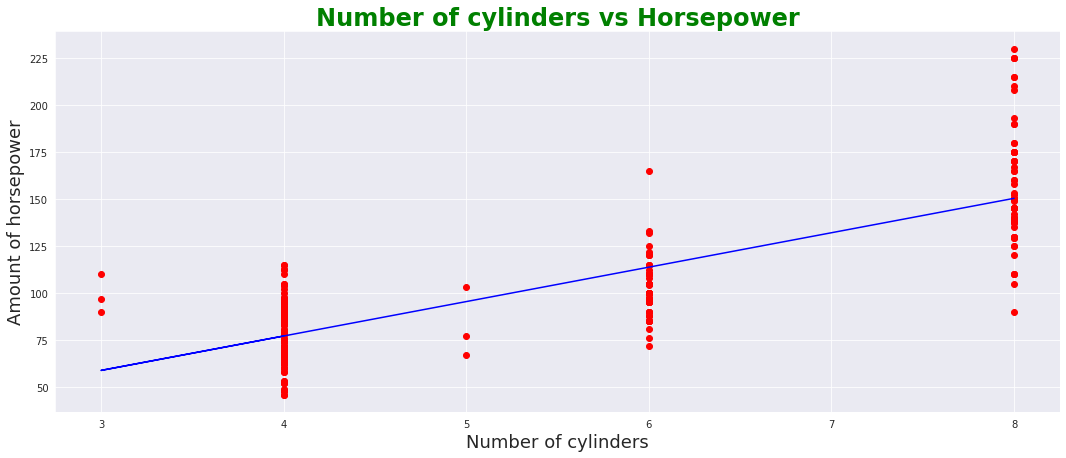

In [54]:
plt.figure(figsize=(18,7))
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,reg.predict(x_train),color='blue')
plt.xlabel('Number of cylinders',size=18)
plt.ylabel('Amount of horsepower',size=18)
plt.title('Number of cylinders vs Horsepower',size=24,fontweight='bold',color='green')
plt.show()

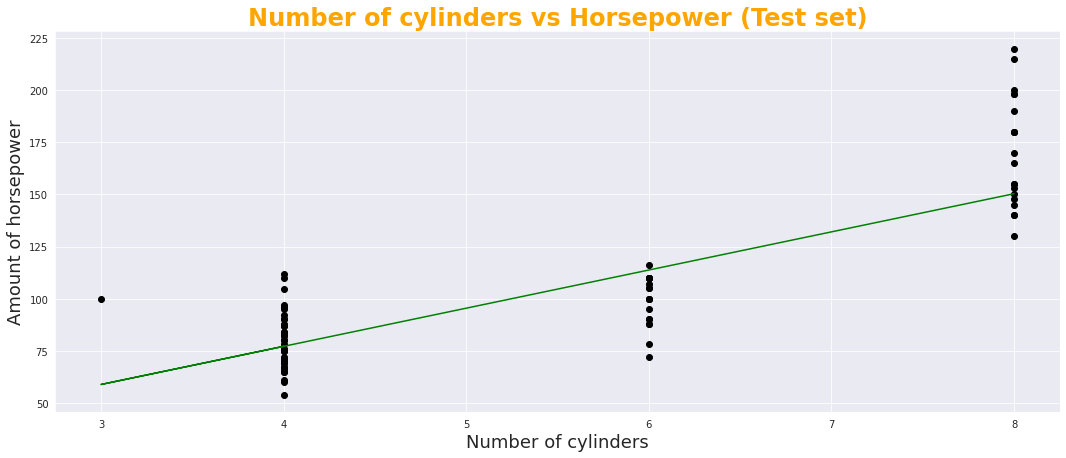

In [55]:
plt.figure(figsize=(18,7))
plt.scatter(x_test,y_test,color='black')
plt.plot(x_train,reg.predict(x_train),color='green')
plt.xlabel('Number of cylinders',size=18)
plt.ylabel('Amount of horsepower',size=18)
plt.title('Number of cylinders vs Horsepower (Test set)',size=24,fontweight='bold',color='orange')
plt.show()

In [56]:
x = df.iloc[:,2].values.reshape(-1,1)
y = df.iloc[:,3].values
